In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from pathlib import Path

In [16]:
# File paths for loading
GDP_data_to_load = Path("data/GDP.csv")
particle_data_to_load = Path("data/part-con.csv")
lung_data_to_load = Path("data/dataset-cumulative-risk-in-percentage-inc-males-and-females-age-0-74-lung.csv")
melanoma_data_to_load = Path("data/dataset-cumulative-risk-in-percentage-inc-males-and-females-age-0-74-2000-2018-melanoma-of-skin.csv")


In [71]:
# Read and clean particle data
particle_data = pd.read_csv(particle_data_to_load)

particle_keep_columns = ["Location", "Period", "Dim1", "FactValueNumeric", "FactValueNumericLow",
                          "FactValueNumericHigh"]
particle_data = particle_data[particle_keep_columns]
particle_data = particle_data.rename(columns={
    "Location": "Country",
    "Period": "Year",
    "Dim1": "Area Type",
    "FactValueNumeric": "Average Weighted Concentration",
    "FactValueNumericLow": "Low Concetration",
    "FactValueNumericHigh": "High Concentration"
})

In [72]:
# Clean GDP_data
GDP_data = pd.read_csv(GDP_data_to_load)
# drop empty columns and columns with repititious and useless values
gdp_drop_columns = ["GDP", "Scale", "Base Year"]
GDP_data = GDP_data.drop(columns=gdp_drop_columns)

GDP_data["Average GDP"] = ""

years = ["2017", "2018", "2019", "2020", "2021", "2022"]
for index, row in GDP_data.iterrows():
    num_elems = 0
    total = 0
    for y in years:
        if row[y] != "...":
            num_elems += 1
            parts = row[y].split(',')
            comb_str = ""
            for p in parts:
                comb_str += p
            total += float(comb_str)
    row["Average GDP"] = round(total/float(num_elems), 2)


In [73]:
# Make function for cleaning cancer data
def clean_cancer_data(df):
    drop_cols = ["Cancer id", "Cancer label", "Population id", "Type"]
    rename_dict = {"Country label": "Country"}
    clean_df = df.drop(columns=drop_cols)
    clean_df = clean_df.rename(columns=rename_dict)
    clean_df["Sex"] = clean_df["Sex"].replace(1, "Male")
    clean_df["Sex"] = clean_df["Sex"].replace(2, "Female")
    clean_df["Country"] = clean_df["Country"].replace("Kuwait: Kuwaiti", "Kuwait")
    return clean_df

# Load and clean skin and lung cancer data
lung_data = pd.read_csv(lung_data_to_load)
melanoma_data = pd.read_csv(melanoma_data_to_load)

lung_data = clean_cancer_data(lung_data)
melanoma_data = clean_cancer_data(melanoma_data)

In [75]:
def particle_match_country(particle_df, cancer_country, particle_country):
    particle_df["Country"] = particle_df["Country"].replace(particle_country, cancer_country)

def gdp_match_country(gdp_df, cancer_country, gdp_country):
    gdp_df["Country"] = gdp_df["Country"].replace(gdp_country, cancer_country)

def match_country_names(particle_df, gdp_df, cancer_country, particle_country, gdp_country):
    particle_match_country(particle_df, cancer_country, particle_country)
    gdp_match_country(gdp_df, cancer_country, gdp_country)

match_country_names(particle_data, GDP_data, "USA", "United States of America", "United States")
gdp_match_country(GDP_data, "Republic of Korea", "Korea, Rep. of")
gdp_match_country(GDP_data, "China", "China, P.R.: Mainland")
gdp_match_country(GDP_data, "Belarus", "Belarus, Rep. of")
match_country_names(particle_data, GDP_data, "Turkey", "Türkiye", "Türkiye, Rep of")

In [21]:
particle_data.head()

,Country,Year,Area Type,Average Weighted Concentration,Low Concetration,High Concentration
0,Kenya,2019,Cities,10.01,6.29,13.74
1,Trinidad and Tobago,2019,Rural,10.02,7.44,12.55
2,United Kingdom of Great Britain and Northern I...,2019,Cities,10.06,9.73,10.39
3,Grenada,2019,Total,10.08,7.07,13.20
4,Brazil,2019,Towns,10.09,8.23,12.46


In [22]:
GDP_data

,Country,2017,2018,2019,2020,2021,2022,Average GDP
0,"Afghanistan, Islamic Rep. of","1,285,460.00","1,327,690.00","1,469,600.00","1,547,290.00","1,232,858.30",...,1372579.66
1,Albania,"1,550,645.49","1,636,731.32","1,691,903.43","1,647,431.07","1,856,172.26","2,134,463.55",1752891.19
2,Algeria,...,"20,393,524.41","20,500,200.00","18,477,000.00","22,079,300.00",...,20362506.1
3,"Andorra, Principality of","2,655.76","2,725.27","2,818.42","2,531.09","2,815.42",...,2709.19
4,Angola,"20,262,300.00","25,627,742.12","30,330,429.40","33,063,020.24","46,696,955.73",...,31196089.5
...,...,...,...,...,...,...,...,...
191,Vietnam,"6,293,904,553.91","7,009,042,131.66","7,707,200,287.05","8,044,385,729.09","8,479,666,500.09","9,513,327,033.80",7841254372.6
192,West Bank and Gaza,"16,128.00","16,232.40","17,057.30","15,512.80","18,109.00","19,111.90",17025.23
193,"Yemen, Rep. of","10,006,000.00","11,578,730.91","12,606,261.15","14,005,570.00","20,617,480.00",...,13762808.41
194,Zambia,"246,510.00","275,174.50","300,456.80","331,363.67","442,479.03",...,319196.8


In [23]:
# # List of countries you want to include in the bar chart
# selected_countries = ["USA", "China", "Belarus", "Turkey", "Canada", "Chile","Columbia", "Costa Rica", 
# "Ecuador", "Germany", "India", "Australia", "Israel", "Japan", 
# "Republic of Korea", "Kuwait", "Malta", "New Zealand", 
# "Norway", "Sweden", "Brazil", "Thailand", "Turkey", "Uganda", "Ukraine"]

# # Filter the GDP data to include only the selected countries
# selected_GDP_data = GDP_data[GDP_data["Country"].isin(selected_countries)]

# plt.figure(figsize=(10, 6))
# plt.bar(selected_GDP_data["Country"], selected_GDP_data["Average GDP"])
# plt.xlabel("Country")
# plt.ylabel("Average GDP")
# plt.title("Average GDP by Country")
# plt.xticks(rotation=90)
# plt.show()


In [24]:
lung_data.head()

,Country,Sex,Year,ASR (World),Crude rate,Cumulative risk,Total
0,Belarus,Male,2000,59.877021,75.817569,8.360745,3484
1,Belarus,Male,2001,59.234048,74.673718,8.204052,3416
2,Belarus,Male,2002,57.087689,72.084418,7.935269,3278
3,Belarus,Male,2003,58.440589,73.686095,8.178290,3310
4,Belarus,Male,2004,58.032474,72.485494,8.145855,3230


In [25]:
melanoma_data.head()

,Country,Sex,Year,ASR (World),Crude rate,Cumulative risk,Total
0,Belarus,Male,2000,2.569562,3.177200,0.330698,146
1,Belarus,Male,2001,2.582797,3.300858,0.320393,151
2,Belarus,Male,2002,2.609352,3.320545,0.319802,151
3,Belarus,Male,2003,2.699419,3.316987,0.324824,149
4,Belarus,Male,2004,3.623803,4.510707,0.424321,201


In [26]:
# Merge all the dataframes
selected_countries = ["USA", "China", "Belarus", "Turkey", "Canada", "Chile","Columbia", "Costa Rica", 
"Ecuador", "Germany", "India", "Australia", "Israel", "Japan", 
"Republic of Korea", "Kuwait", "Malta", "New Zealand", 
"Norway", "Sweden", "Brazil", "Thailand", "Turkey", "Uganda", "Ukraine"]

lung_pollution_data = lung_data.merge(particle_data, how='left', on=['Country', 'Year']).dropna()
melanoma_pollution_data = melanoma_data.merge(particle_data, how='left', on=['Country', 'Year']).dropna()

# lung_full_data = lung_pollution_data.merge(GDP_data, how='left', on='Country').dropna()
# melanoma_full_data = melanoma_pollution_data.merge(GDP_data, how='left', on='Country').dropna()

lung_pollution_data.tail(10)

,Country,Sex,Year,ASR (World),Crude rate,Cumulative risk,Total,Area Type,Average Weighted Concentration,Low Concetration,High Concentration
1384,USA,Female,2015,19.756106,32.460745,3.080435,6197,Rural,7.30,7.19,7.46
1385,USA,Female,2015,19.756106,32.460745,3.080435,6197,Towns,8.15,8.02,8.29
1386,USA,Female,2015,19.756106,32.460745,3.080435,6197,Total,8.31,8.21,8.43
1387,USA,Female,2015,19.756106,32.460745,3.080435,6197,Urban,8.62,8.51,8.75
1388,USA,Female,2015,19.756106,32.460745,3.080435,6197,Cities,8.87,8.73,9.01
1389,USA,Female,2016,19.326672,32.291810,2.978893,6203,Rural,6.58,6.48,6.69
1390,USA,Female,2016,19.326672,32.291810,2.978893,6203,Towns,7.36,7.24,7.45
1391,USA,Female,2016,19.326672,32.291810,2.978893,6203,Total,7.54,7.44,7.63
1392,USA,Female,2016,19.326672,32.291810,2.978893,6203,Urban,7.84,7.73,7.94
1393,USA,Female,2016,19.326672,32.291810,2.978893,6203,Cities,8.09,7.96,8.20


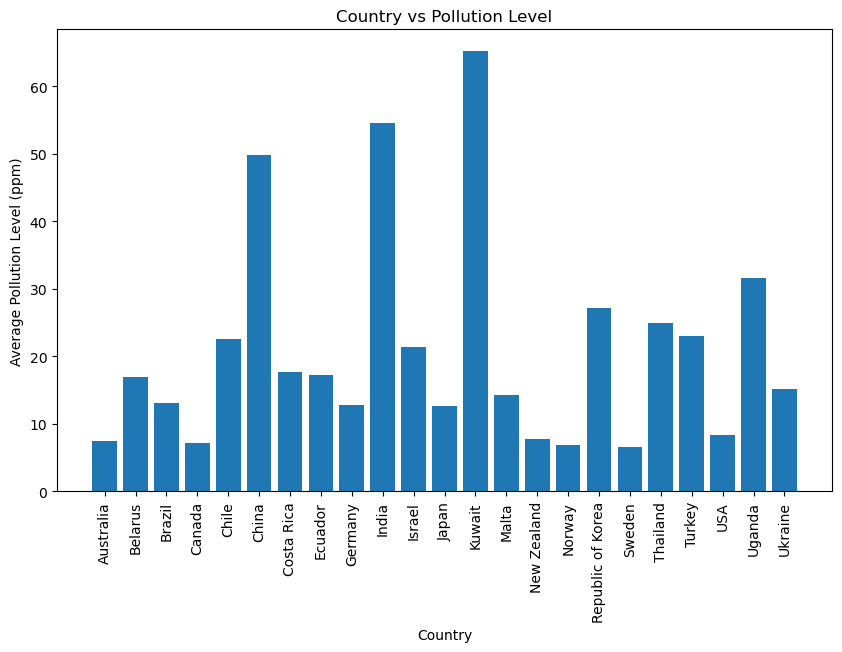

In [55]:

# Filter the particle data to include only the selected countries
selected_particle_data = particle_data[particle_data["Country"].isin(selected_countries)]
selected_particle_data = selected_particle_data[selected_particle_data["Area Type"] == "Total"]
grouped_particle_data = selected_particle_data.groupby("Country").mean(numeric_only = True)["Average Weighted Concentration"]
countries = grouped_particle_data.index
particle_values = grouped_particle_data.values

# find the countries with the highest polution indices
plt.figure(figsize=(10, 6))
plt.bar(countries, particle_values)
plt.xlabel("Country")
plt.ylabel("Average Pollution Level (ppm)")
plt.title("Country vs Pollution Level")
plt.xticks(rotation=90)
plt.show()

#create a bar chart


In [43]:
# Get IQR and find outliers
quartiles = grouped_particle_data.quantile([0.25, 0.75])
IQR = quartiles[0.75] - quartiles[0.25]
lowerBound = quartiles[0.25] - 1.5 * IQR
upperBound = quartiles[0.75] + 1.5 * IQR

pollution_low_outliers = grouped_particle_data[grouped_particle_data.values < lowerBound]
pollution_high_outliers = grouped_particle_data[grouped_particle_data.values > upperBound]

print("Low Outliers")
print("------------")
if (len(pollution_low_outliers.index) == 0):
    print("No low outliers")
else:
    print(pollution_low_outliers)
print()
print("High Outliers")
print("-------------")
if (len(pollution_high_outliers.index) == 0):
    print("No high outliers")
else:
    print(pollution_high_outliers)

Low Outliers
------------
No low outliers

High Outliers
-------------
Country
China     49.782
India     54.546
Kuwait    65.132
Name: Average Weighted Concentration, dtype: float64


**Analysis:** From the above, we can see that there are no countries that are abnormally less polluted than the rest of the countries we have selected. However, we can see that China, India, and Kuwait are significantly more polluted than the countries that we chose.

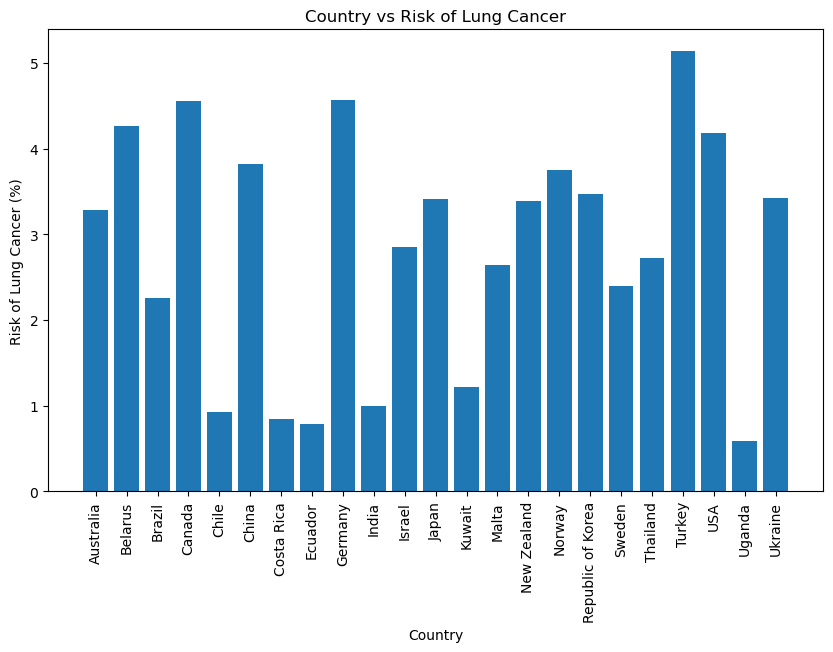

In [54]:
# Filter the GDP data to include only the selected countries
selected_lung_data = lung_data[lung_data["Country"].isin(selected_countries)]
lung_cumul_risk = selected_lung_data.groupby("Country").mean(numeric_only = True)["Cumulative risk"]
lung_values = lung_cumul_risk.values

# Find the number of lung cancer victims for our Countries sample

plt.figure(figsize=(10, 6))
plt.bar(countries, lung_values)
plt.xlabel("Country")
plt.ylabel("Risk of Lung Cancer (%)")
plt.title("Country vs Risk of Lung Cancer")
plt.xticks(rotation=90)
plt.show()

# run a regression line
# Creat a bar chart that reflects number lung cancer victims per country and their GDP and pollution level

In [30]:
# Get IQR and find outliers
lung_quartiles = lung_cumul_risk.quantile([0.25, 0.75])
lung_IQR = lung_quartiles[0.75] - lung_quartiles[0.25]
lung_lower_bound = lung_quartiles[0.25] - 1.5 * lung_IQR
lung_upper_bound = lung_quartiles[0.75] + 1.5 * lung_IQR
# print(f"IQR: {IQR}, upper: {upperBound}, lower: {lowerBound}")

lung_low_outliers = lung_cumul_risk[lung_cumul_risk.values < lung_lower_bound]
lung_high_outliers = lung_cumul_risk[lung_cumul_risk.values > lung_upper_bound]

print("Low Outliers")
print("------------")
if (len(lung_low_outliers.index) == 0):
    print("No low outliers")
else:
    print(lung_low_outliers)
print()
print("High Outliers")
print("-------------")
if (len(lung_high_outliers.index) == 0):
    print("No high outliers")
else:
    print(lung_high_outliers)

Low Outliers
------------
No low outliers

High Outliers
-------------
No high outliers


**Analysis:** Based off of the above, we see that there are no countries that have an exceptionally high or low risk of getting lung cancer.

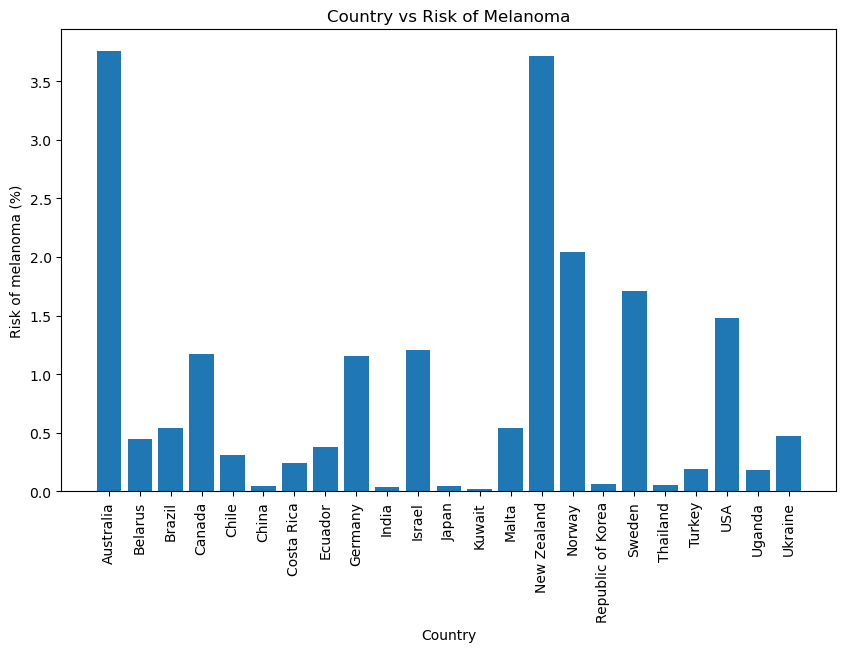

In [56]:
# Find the number of melanoma cancer victims for our Countries sample
selected_melanoma_data = melanoma_data[melanoma_data["Country"].isin(selected_countries)]
melanoma_cumul_risk = selected_melanoma_data.groupby("Country").mean(numeric_only = True)["Cumulative risk"]
melanoma_values = melanoma_cumul_risk.values

# Create a bar chart that reflects number of melanoma victims per country and their GDP and pollution level
plt.figure(figsize=(10, 6))
plt.bar(countries, melanoma_values)
plt.xlabel("Country")
plt.ylabel("Risk of melanoma (%)")
plt.title("Country vs Risk of Melanoma")
plt.xticks(rotation=90)
plt.show()


In [32]:
# Get IQR and find outliers
melanoma_quartiles = melanoma_cumul_risk.quantile([0.25, 0.75])
melanoma_IQR = melanoma_quartiles[0.75] - melanoma_quartiles[0.25]
melanoma_lower_bound = melanoma_quartiles[0.25] - 1.5 * melanoma_IQR
melanoma_upper_bound = melanoma_quartiles[0.75] + 1.5 * melanoma_IQR
# print(f"IQR: {IQR}, upper: {upperBound}, lower: {lowerBound}")

melanoma_low_outliers = melanoma_cumul_risk[melanoma_cumul_risk.values < melanoma_lower_bound]
melanoma_high_outliers = melanoma_cumul_risk[melanoma_cumul_risk.values > melanoma_upper_bound]

print("Low Outliers")
print("------------")
if (len(melanoma_low_outliers.index) == 0):
    print("No low outliers")
else:
    print(melanoma_low_outliers)
print()
print("High Outliers")
print("-------------")
if (len(melanoma_high_outliers.index) == 0):
    print("No high outliers")
else:
    print(melanoma_high_outliers)

Low Outliers
------------
No low outliers

High Outliers
-------------
Country
Australia      3.753294
New Zealand    3.716911
Name: Cumulative risk, dtype: float64


**Analysis:** There are no countries where there is an very low risk of getting melanoma, however there are countries that have high risk of getting melanoma: Australia and New Zealand.

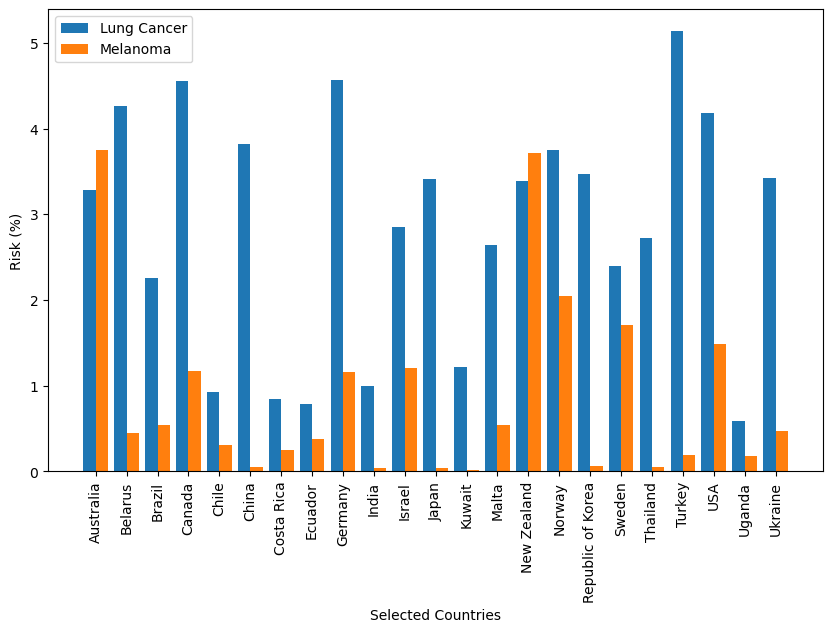

In [77]:
# Plot melanoma and lung cancer data side by side
x_axis = np.arange(len(countries))
plt.figure(figsize=(10, 6))
plt.bar(x_axis - 0.2, lung_values, 0.4, label="Lung Cancer")
plt.bar(x_axis + 0.2, melanoma_values, 0.4, label="Melanoma")
plt.xticks(x_axis, countries, rotation=90)
plt.xlabel("Selected Countries")
plt.ylabel("Risk (%)")
plt.legend(loc="upper left")
plt.show()


**Analysis:** Based on the graph shown above, we can see that in most countries, the risk of getting lung cancer is much higher than the risk of getting melanoma. However, in Australia and New Zealand, we see that the opposite is true, and that the risk for getting melanoma is slightly higher than the risk of getting lung cancer.

In [81]:
# Create dataframes and series to do analysis on
full_data = pd.DataFrame({
    "Country": countries,
    "Pollution": particle_values,
    "Lung": lung_values,
    "Melanoma": melanoma_values
})

cys_lung_data = lung_data.groupby(["Country", "Year", "Sex"]).first()
cys_melanoma_data = melanoma_data.groupby(["Country", "Year", "Sex"]).first()
cs_lung_data = lung_data.groupby(["Country", "Sex"]).mean(numeric_only = True)["Cumulative risk"]
cs_melanoma_data = melanoma_data.groupby(["Country", "Sex"]).mean(numeric_only = True)["Cumulative risk"]
cy_lung_data = lung_data.groupby(["Country", "Year"]).mean(numeric_only = True)["Cumulative risk"]
cy_melanoma_data = melanoma_data.groupby(["Country", "Year"]).mean(numeric_only = True)["Cumulative risk"]

In [82]:
# full_data

print("Country Year Sex grouping for cancer data")
print(cys_lung_data)
print()
print(cys_melanoma_data)
print()
print("Country Sex grouping for cancer data")
print(cs_lung_data)
print()
print(cs_melanoma_data)
print()
print("Country Year grouping for cancer data")
print(cy_lung_data)
print()
print(cy_melanoma_data)
print()

Country Year Sex grouping for cancer data
                       ASR (World)  Crude rate  Cumulative risk  Total
Country   Year Sex                                                    
Australia 2000 Female    15.411858   20.835844         2.309901   1862
               Male      29.991034   39.246846         4.692805   3544
          2001 Female    15.128466   20.530208         2.228812   1856
               Male      29.289427   38.763023         4.622622   3538
          2002 Female    15.436344   21.204069         2.298608   1936
...                            ...         ...              ...    ...
Ukraine   2013 Male      40.504491   57.289375         5.723507  10832
          2014 Female     5.523438    9.757215         0.752733   1726
               Male      40.049829   56.144761         5.642446   9048
          2015 Female     5.493675    9.812277         0.757015   1726
               Male      38.081068   53.780867         5.370909   8643

[658 rows x 4 columns]

          

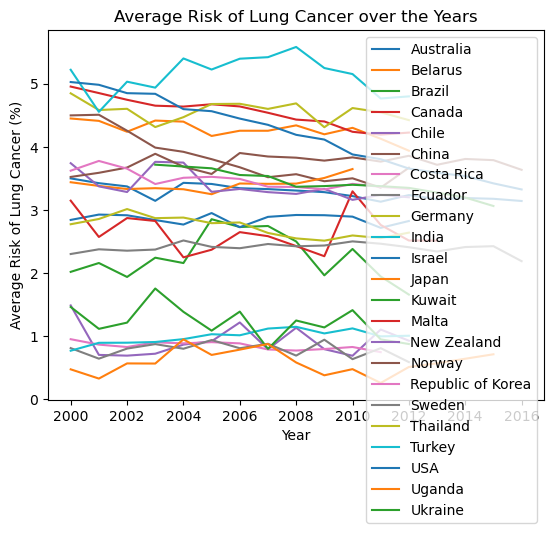

In [98]:
# for x in countries:
#     plt.plot(cy_lung_data[x].index, cy_lung_data[x].values, label=x)
# plt.title("Average Risk of Lung Cancer over the Years")
# plt.xlabel("Year")
# plt.ylabel("Average Risk of Lung Cancer (%)")
# plt.legend()
# plt.show()

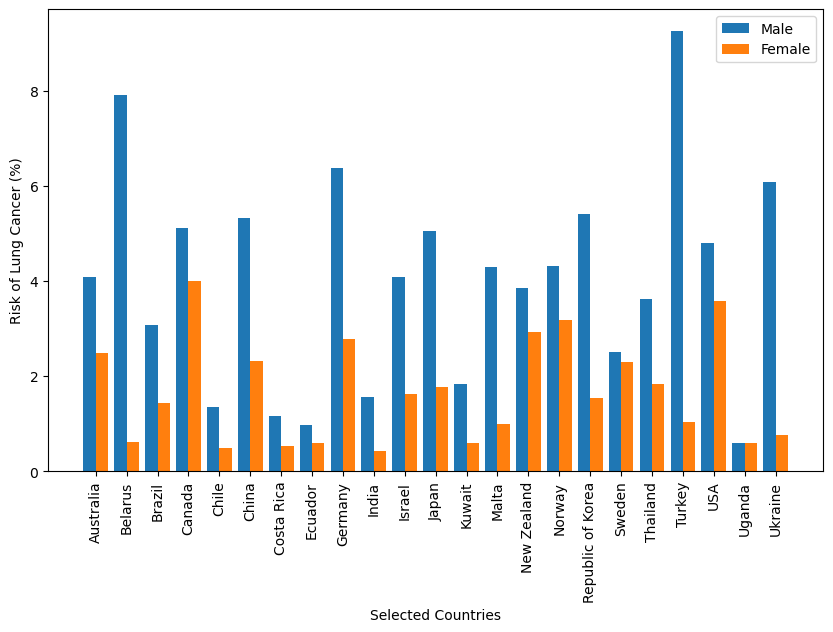

In [108]:
x_axis = np.arange(len(countries))
male_lung_data = list()
female_lung_data = list()
for x in countries:
    male_lung_data.append(cs_lung_data[x]["Male"])
    female_lung_data.append(cs_lung_data[x]["Female"])
plt.figure(figsize=(10, 6))
plt.bar(x_axis - 0.2, male_lung_data, 0.4, label="Male")
plt.bar(x_axis + 0.2, female_lung_data, 0.4, label="Female")
plt.xticks(x_axis, countries, rotation=90)
plt.legend(loc="upper right")
plt.ylabel("Risk of Lung Cancer (%)")
plt.xlabel("Selected Countries")
plt.show()

In [111]:
uganda_male = cs_lung_data["Uganda"]["Male"]
uganda_female = cs_lung_data["Uganda"]["Female"]
print(f"Uganda male risk: {uganda_male}")
print(f"Uganda female risk: {uganda_female}")

Uganda male risk: 0.58931285720625
Uganda female risk: 0.58745942624375


**Analysis:** Based on the graph and the zoomed in values for Uganda, we can see that overall, males have a higher risk of getting lung cancer vs. females. Zooming in on Uganda, we can see that males have a very slightly higher risk of getting lung cancer vs. females

In [63]:
# This function allows us to quickly plot linear regressions as well as look at the r values for these linear regressions
def plot_regression(x_values, y_values, title, x_label, y_label, x_text, y_text):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    eq_str = f"y = {slope:.2f}x "
    if intercept < 0:
        intercept *= -1
        eq_str += f" - {intercept:.2f}"
    elif intercept > 0:
        eq_str += f" + {intercept:.2f}"
    regress_values = slope * x_values + intercept
    print(f"The r-value is {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.text(x_text, y_text, eq_str, color="red", fontsize="x-large")
    plt.show()

The r-value is -0.3997549553415443


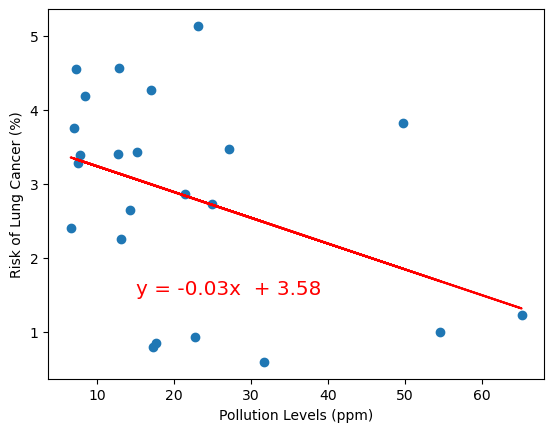

In [66]:
plot_regression(full_data["Pollution"], full_data["Lung"], "Pollution Levels vs. Risk of Lung Cancer", "Pollution Levels (ppm)", "Risk of Lung Cancer (%)", 15, 1.5)

**Analysis:** Based on the r-value and the graph, we can see that the pollution levels and risk of lung cancer has a weak negative correlation. This negative correlation may be showing because of sampling bias.

The r-value is -0.5493221892319218


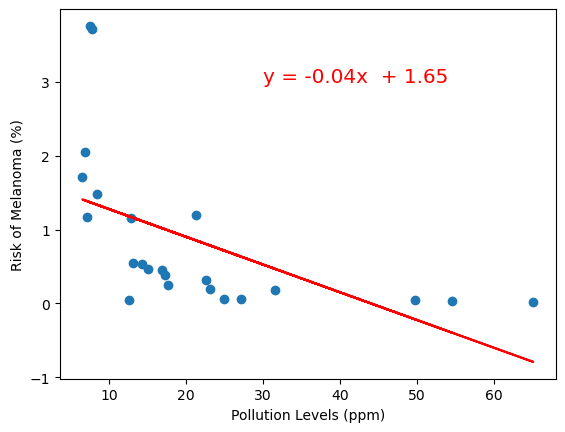

In [68]:
plot_regression(full_data["Pollution"], full_data["Melanoma"], "Pollution Levels vs. Risk of Melanoma", "Pollution Levels (ppm)", "Risk of Melanoma (%)", 30, 3)

**Analysis:** In the graph above, we can see that there is a negative exponential correlation between pollution levels and risk of melanoma. In general, as there is more particulate matter in the air, there is less risk of getting melanoma based off the data we've gathered from select countries. This makes sense as the particulate matter may block the sun rays that are coming through the atmosphere, thus reducing the amount of harsh UV rays that can harm the skin.

The r-value is 0.2845948509722467


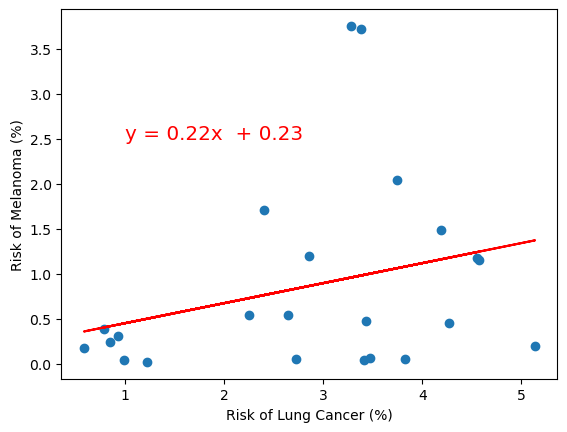

In [69]:
plot_regression(full_data["Lung"], full_data["Melanoma"], "Risk of Lung Cancer vs. Risk of Melanoma", "Risk of Lung Cancer (%)", "Risk of Melanoma (%)", 1, 2.5)

**Analysis:** Based on the graph above, we can see that there is a very weak positive correlation between the risk of lung cancer and the risk of melanoma. With more data, there is a possibility we would see different results.